In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('data/data_preprocessed.csv')

In [108]:
df["product"].value_counts(normalize=True)

product
Кредитная карта         0.527699
Кредит                  0.185284
Страхование и услуги    0.139218
Дебетовая карта         0.101142
Инвестиции              0.046656
Name: proportion, dtype: float64

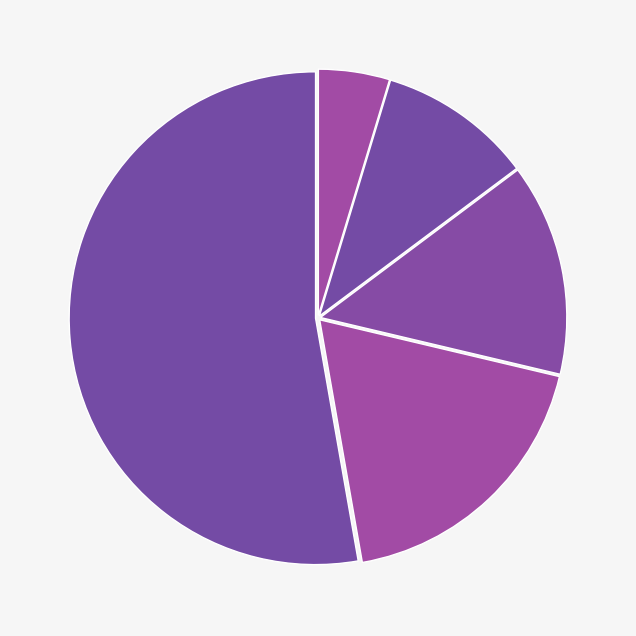

In [107]:
# Customizing our pie chart
colors = ['#744BA5', "#A24BA5", "#864BA5"]
subs = df["product"].value_counts()
bundle_group_labels = df["product"].unique()

plt.rcParams.update({
    'font.size': 12,  # Общий размер шрифта для текста
    'axes.titlesize': 14,  # Размер шрифта для заголовков осей
    'axes.labelsize': 12,  # Размер шрифта для подписей осей
    'xtick.labelsize': 10,  # Размер шрифта для меток на оси X
    'ytick.labelsize': 10  # Размер шрифта для меток на оси Y
})

plt.figure(figsize=(8, 8))

# Создаем массив explode для создания пространства между сегментами
explode = [0.01] * len(subs)  # Вытягиваем все сегменты

# Убираем все подписи и проценты, добавляем explode
plt.pie(subs, labels=None, startangle=90, colors=colors, radius=1, explode=explode)
plt.gcf().set_facecolor('#F6F6F6')
plt.savefig('pie_chart.png', format='png')
plt.show()

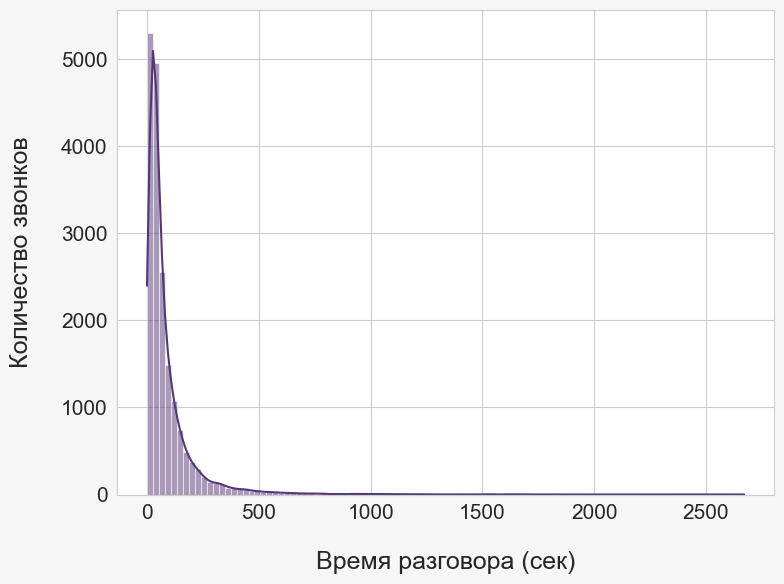

In [109]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.gcf().set_facecolor('#F6F6F6')

sns.histplot(data=df, x='state_talk_time_sec', color="#543777", kde=True, bins=100)

plt.xlabel('Время разговора (сек)', fontsize=18, labelpad=20.0)
plt.ylabel('Количество звонков', fontsize=18, labelpad=20.0)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Подгонка элементов
plt.tight_layout()

# Отображаем график
plt.show()

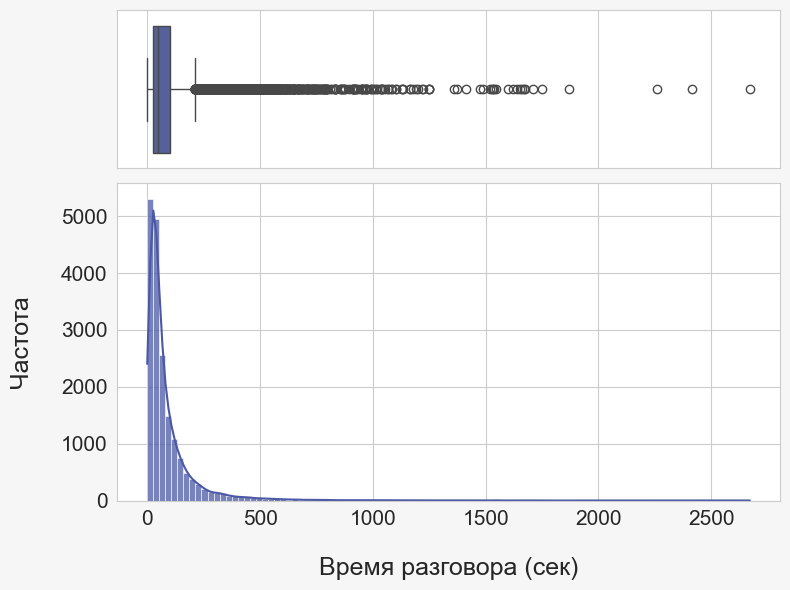

In [80]:
# Создаем фигуру и оси
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [1, 2]})
sns.set_style("whitegrid")  # Настройка стиля фона

# Устанавливаем цвет фона
fig.set_facecolor('#F6F6F6')

# Построение boxplot
sns.boxplot(data=df, x='state_talk_time_sec', ax=ax1, color="#4B58A5")

# Построение histplot
sns.histplot(data=df, x='state_talk_time_sec', ax=ax2, color="#4B58A5", kde=True, bins=100, alpha=0.75)

# Настройка подписей
ax1.set_ylabel('', fontsize=18, labelpad=20.0)
ax2.set_xlabel('Время разговора (сек)', fontsize=18, labelpad=20.0)
ax2.set_ylabel('Частота', fontsize=18, labelpad=20.0)

# Настройка шрифтов для осей
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)

# Подгонка элементов
plt.tight_layout()

# Отображаем график
plt.show()

In [4]:
df['gender_cd'] = df['gender_cd'].map({1.0: 'Мужчина', 0.0: 'Женщина'})
df.rename({'gender_cd': 'Пол клиента'}, axis=1, inplace=True)

In [5]:
df.gender_cd.value_counts().sum()

AttributeError: 'DataFrame' object has no attribute 'gender_cd'

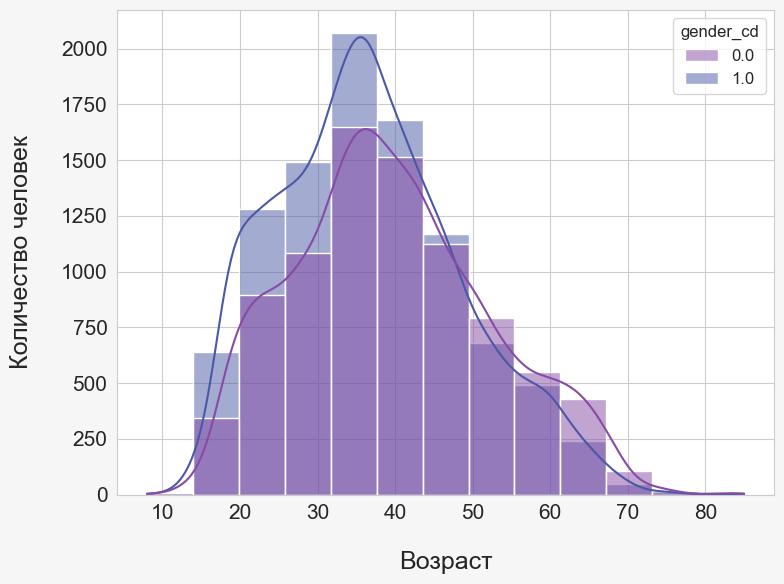

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль фона
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Настройка стиля фона

# Устанавливаем цвет фона
plt.gcf().set_facecolor('#F6F6F6')

# Построение гистограммы
sns.histplot(data=df, x='age', bins=13, kde=True, hue='gender_cd',
             palette=["#864BA5", "#4B58A5"], alpha=0.50)

# Устанавливаем шрифт
plt.rcParams['font.family'] = 'Unbounded'  # Убедитесь, что шрифт установлен в системе

# Настройка подписей
plt.xlabel('Возраст', fontsize=18, labelpad=20.0)
plt.ylabel('Количество человек', fontsize=18, labelpad=20.0)

# Настройка шрифтов для осей
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Подгонка элементов
plt.tight_layout()

# Отображаем график
plt.show()


In [3]:
data = pd.read_csv('data/data_final_preprocessed.csv')

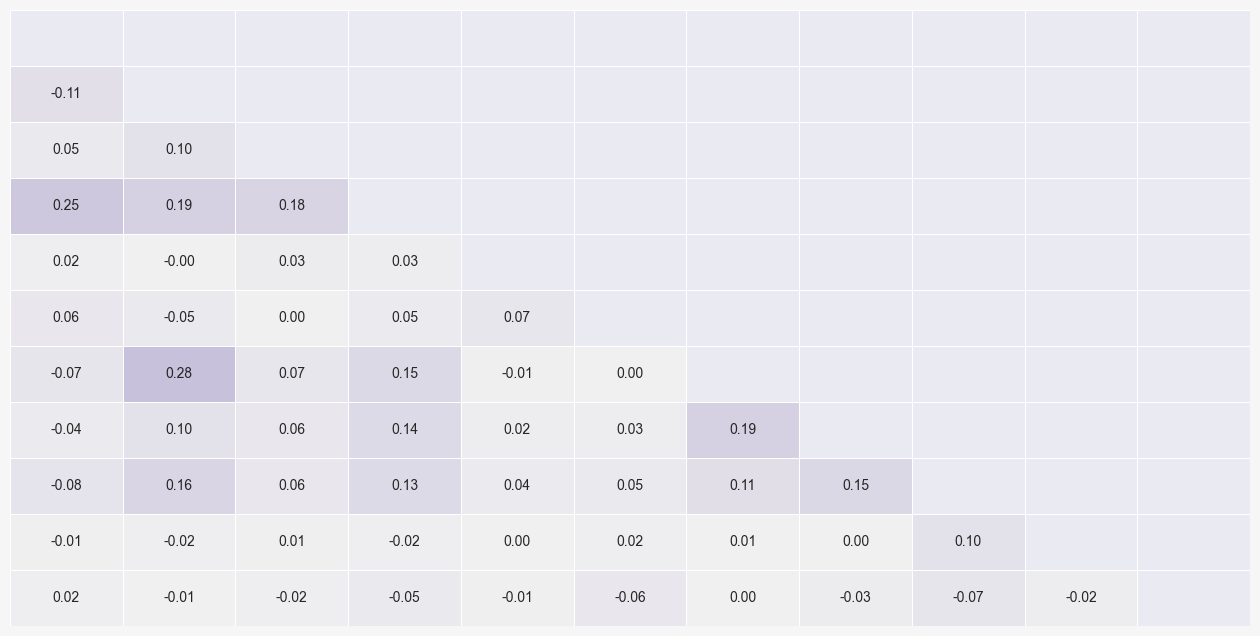

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Создаем свой cmap из цветов в формате HEX
colors = ["#624BA5", "#F1F1F1", "#624BA5"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Вычисляем корреляционную матрицу
columns = ['gender_cd', 'age', 'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'pro_flg',
           'child_amt', 'partnership_flg', 'realty_type', 'region_category', 'success_flg']
correlation_matrix = data[columns].corr(method='spearman')

# Создание маски для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создаем тепловую карту
plt.figure(figsize=(16, 8))
plt.gcf().set_facecolor('#F6F6F6')
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=0.5, vmin=-1, vmax=1, cbar=False, xticklabels=False, yticklabels=False, )
plt.show()
